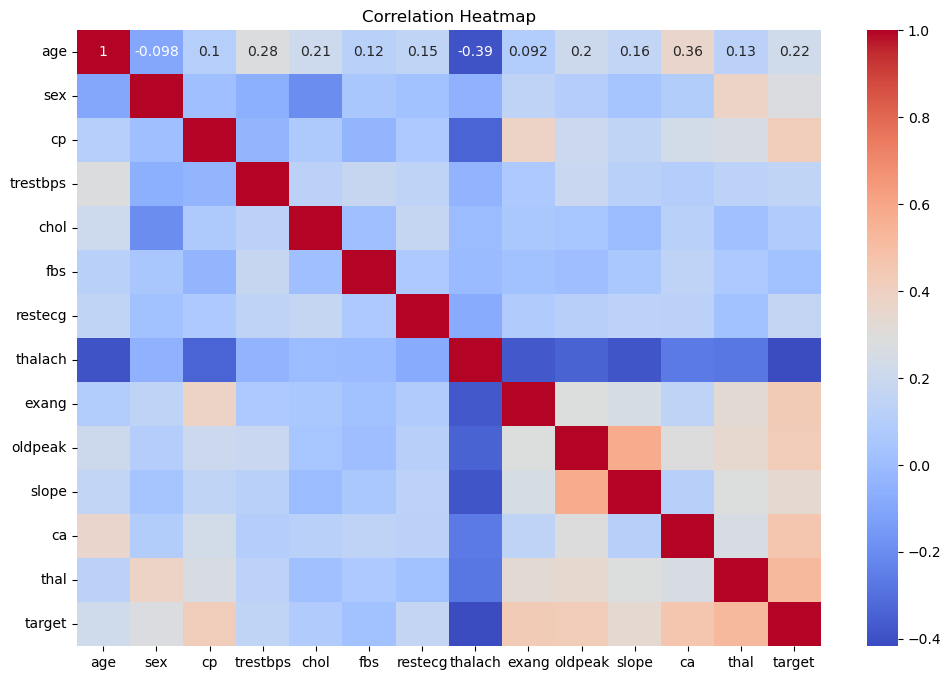

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=columns, na_values='?')

# Rename target column (original uses 'num' as 0-4 values)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

# Handle missing values (mean for numerical, mode for categorical)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['cp', 'thal', 'slope', 'restecg', 'exang', 'fbs']

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations (excluding target)
processed_data = preprocessor.fit_transform(df.drop('target', axis=1))

# Reattach target column
processed_df = pd.DataFrame(
    processed_data,
    columns=preprocessor.get_feature_names_out()
)
processed_df['target'] = df['target'].values

# Save cleaned data
processed_df.to_csv('D:\AI & ML Sprints\data\cleaned_heart_disease.csv', index=False)

# EDA: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('D:/AI & ML Sprints/results/correlation_heatmap.png')